Directory found: C:/Users/DELL/Desktop/mini
Reading images from: C:/Users/DELL/Desktop/mini\train\00
Reading images from: C:/Users/DELL/Desktop/mini\train\11
Reading images from: C:/Users/DELL/Desktop/mini\test\0
Reading images from: C:/Users/DELL/Desktop/mini\test\1
Epoch 1/10
145/145 [==============================] - 75s 520ms/step - loss: 0.4024 - accuracy: 0.8277 - val_loss: 0.5884 - val_accuracy: 0.7424
Epoch 2/10
145/145 [==============================] - 77s 529ms/step - loss: 0.3303 - accuracy: 0.8641 - val_loss: 0.5636 - val_accuracy: 0.6906
Epoch 3/10
145/145 [==============================] - 76s 527ms/step - loss: 0.3270 - accuracy: 0.8682 - val_loss: 0.5025 - val_accuracy: 0.7353
Epoch 4/10
145/145 [==============================] - 76s 523ms/step - loss: 0.3031 - accuracy: 0.8775 - val_loss: 0.5922 - val_accuracy: 0.7180
Epoch 5/10
145/145 [==============================] - 76s 522ms/step - loss: 0.2884 - accuracy: 0.8886 - val_loss: 0.6981 - val_accuracy: 0.6432
Epoch 6

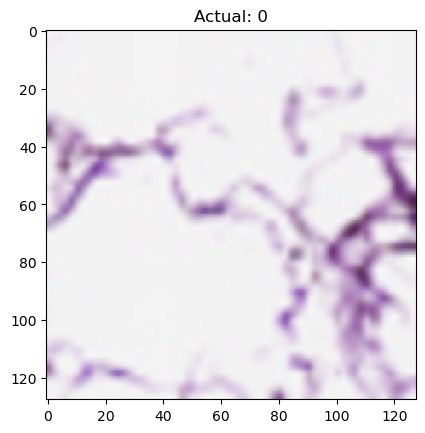

In [8]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Step 1: Define the full path to your 'mini' folder on the Desktop
data_dir = 'C:/Users/DELL/Desktop/mini'

# Check if the directory exists
if os.path.exists(data_dir):
    print(f"Directory found: {data_dir}")
else:
    print(f"Directory not found at {data_dir}")

# Step 2: Define the image size and label mapping
img_size = 128  # Resize images to 128x128
label_mapping = {'0': '00', '1': '11'}  # Map 0/1 to folder names 00/11 in train folder

# Step 3: Function to create a dataset from the folders
def create_image_data(folder, label_mapping):
    data = []
    for label, subfolder in label_mapping.items():
        folder_path = os.path.join(data_dir, folder, subfolder)
        if os.path.exists(folder_path):
            print(f"Reading images from: {folder_path}")
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                # Read image
                img = cv2.imread(img_path)
                img = cv2.resize(img, (img_size, img_size))  # Resize to (128, 128)
                data.append({'path': img_path, 'label': int(label)})
        else:
            print(f"Folder {folder_path} does not exist.")
    return data

# Step 4: Create the dataset for train and test data
train_data = create_image_data('train', label_mapping)
test_data = create_image_data('test', {'0': '0', '1': '1'})

# Step 5: Shuffle the data (for random distribution)
np.random.shuffle(train_data)
np.random.shuffle(test_data)

# Step 6: Extract images and labels from the data
def load_images(data):
    images = []
    labels = []
    for entry in data:
        img = cv2.imread(entry['path'])
        img = cv2.resize(img, (img_size, img_size))  # Resize to (128, 128)
        images.append(img)
        labels.append(entry['label'])
    return np.array(images), np.array(labels)

x_train, y_train = load_images(train_data)
x_test, y_test = load_images(test_data)

# Normalize the data (convert pixel values to the range [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Step 7: Build a simple CNN model using TensorFlow/Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 8: Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Step 9: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Optional: Visualize the first image in the test set
plt.imshow(x_test[0])
plt.title(f"Actual: {y_test[0]}")
plt.show()


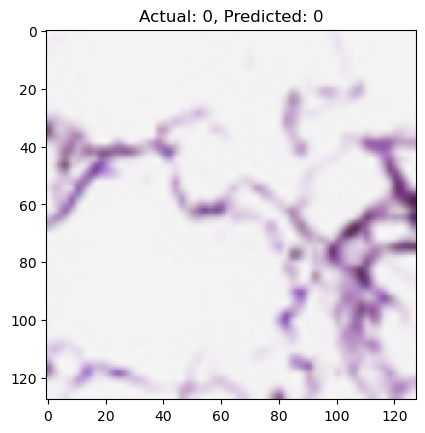

In [10]:
# Get the predicted label for the first test image
predicted_label = model.predict(x_test[0].reshape(1, 128, 128, 3))  # Reshape if required (128x128x3)
predicted_label = np.argmax(predicted_label)  # Get the class with the highest probability

# Plot the image with actual and predicted labels
plt.imshow(x_test[0])
plt.title(f"Actual: {y_test[0]}, Predicted: {predicted_label}")
plt.show()
